In [1]:
from cluster import cluster
from kmeans import kmeans

In [2]:
km = kmeans(4)
km
km5 = kmeans(5)

In [3]:
from sklearn.datasets import make_blobs

X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

In [4]:
from sklearn.cluster import KMeans

skkm = KMeans(n_clusters=4)
skkm.fit(X)
sk_cluster_assignments = skkm.predict(X)
sk_centers = skkm.cluster_centers_

test_cluster_assignments, centers = km.fit(X)

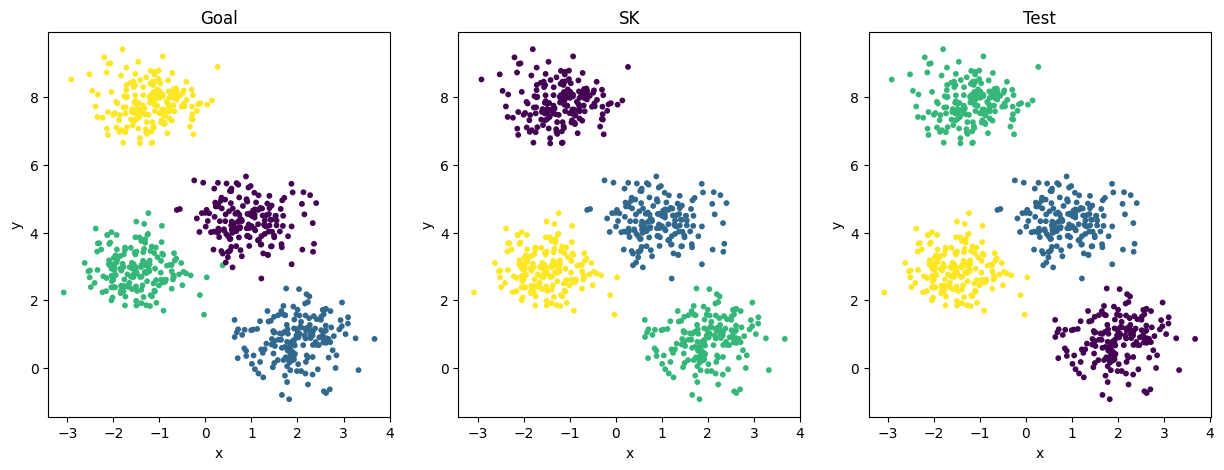

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=cluster_assignments, s=10, cmap='viridis')
axs[0].set_title('Goal')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].scatter(X[:, 0], X[:, 1], c=sk_cluster_assignments, s=10, cmap='viridis')
axs[1].set_title('SK')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

axs[2].scatter(X[:, 0], X[:, 1], c=test_cluster_assignments, s=10, cmap='viridis')
axs[2].set_title('Test')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')

plt.show()

In [6]:
import numpy as np

conditions1 = [test_cluster_assignments == 3, test_cluster_assignments == 2, test_cluster_assignments == 1, test_cluster_assignments == 0]
choices1 = [1, 2, 3, 0]

test_cluster_assignments = np.select(conditions1, choices1)

In [7]:
import pandas as pd

pd.DataFrame(test_cluster_assignments == sk_cluster_assignments).value_counts()

0    
False    700
Name: count, dtype: int64

In [8]:
conditions2 = [cluster_assignments == 3, cluster_assignments == 2, cluster_assignments == 1, cluster_assignments == 0]
choices2 = [2, 1, 0, 3]

cluster_assignments = np.select(conditions2, choices2)

In [9]:
pd.DataFrame(test_cluster_assignments == cluster_assignments).value_counts()

0    
True     699
False      1
Name: count, dtype: int64

## Cluster Mopsi Locations Finland

In [10]:
mopsi_df = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', delimiter='\t', header=None, names=['y', 'x'])
mopsi_df

,y,x
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


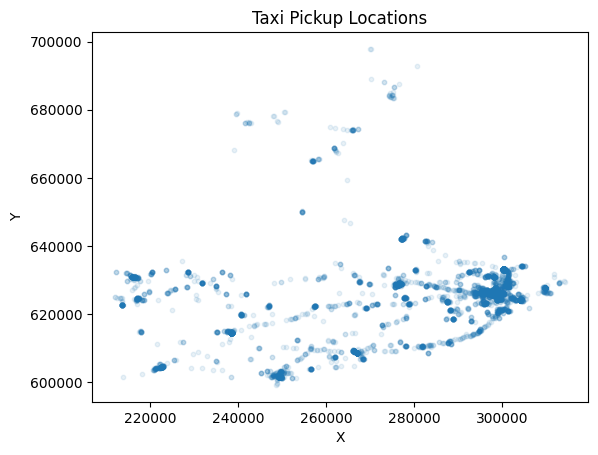

In [11]:
plt.scatter(mopsi_df['x'], mopsi_df['y'], marker='o', s=10, alpha=0.1)
plt.title('Taxi Pickup Locations')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Kmeans was the best fit
Locations aren't hierarchical

The dense lines coming out make dbscan cluster them all together

Cities/towns and areas tend to be circular

In [12]:
mopsi_wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(mopsi_df[['x', 'y']])
    mopsi_wcss.append(kmeans.inertia_)

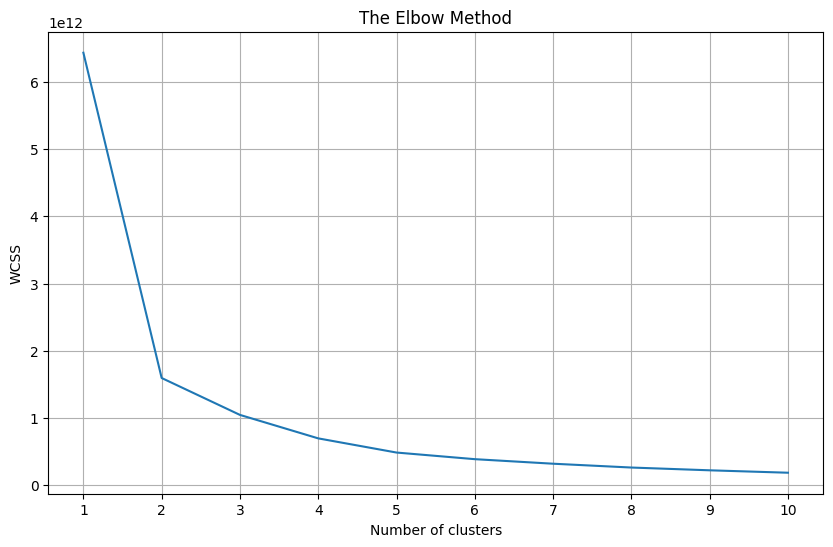

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mopsi_wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

#### Slope has elbow at 2, 3, or 4, but I don't think that's enough for a whole country.
#### I put it at 5 clusters, but could've gone much higher to fit towns/cities more instead of several in the same area

In [14]:
kmeans = KMeans(n_clusters=5, random_state=1)

kmeans.fit(mopsi_df[['x', 'y']])

mopsi_df['cluster'] = kmeans.predict(mopsi_df[['x', 'y']])

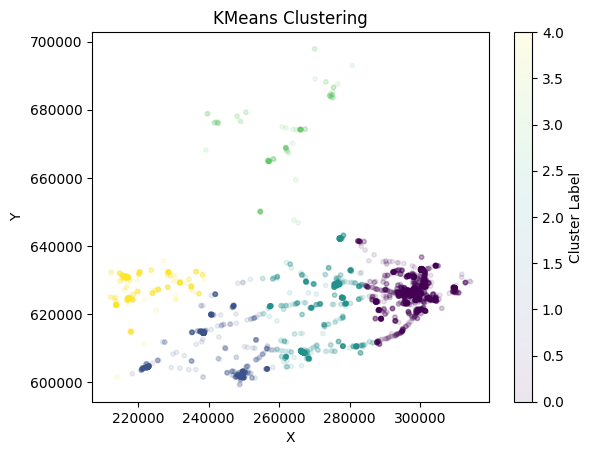

In [15]:
import matplotlib.pyplot as plt

plt.scatter(mopsi_df['x'], mopsi_df['y'], c=mopsi_df['cluster'], cmap='viridis', marker='o', s=10, alpha=0.1)
plt.title('KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.show()

In [16]:
mopsi_df['cluster_mine'], _ = km5.fit(mopsi_df[['x', 'y']])

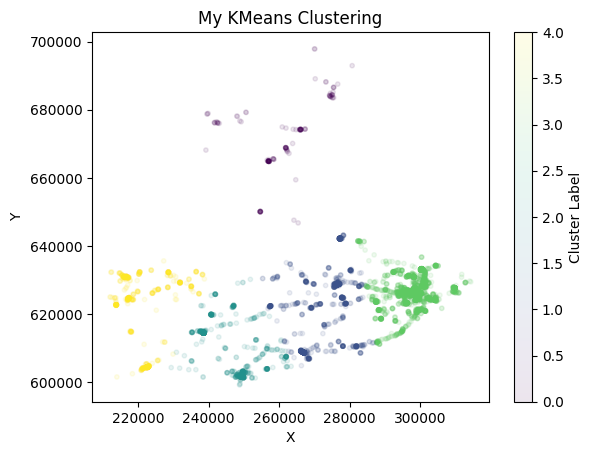

In [17]:
plt.scatter(mopsi_df['x'], mopsi_df['y'], c=mopsi_df['cluster_mine'], cmap='viridis', marker='o', s=10, alpha=0.1)
plt.title('My KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.show()

In [18]:
mopsi_conditions = [mopsi_df['cluster_mine'] == 4, mopsi_df['cluster_mine'] == 3, mopsi_df['cluster_mine'] == 2, mopsi_df['cluster_mine'] == 1, mopsi_df['cluster_mine'] == 0]
mopsi_choices = [1, 2, 3, 4, 0]

mopsi_df['cluster_mine'] = np.select(mopsi_conditions, mopsi_choices)

In [19]:
pd.DataFrame(mopsi_df['cluster'] == mopsi_df['cluster_mine']).value_counts()

0    
False    13298
True       169
Name: count, dtype: int64

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

mopsi_dbscan = DBSCAN(eps=0.7, min_samples=1)

scaler = StandardScaler()
scaled_mopsi = scaler.fit_transform(mopsi_df[['x', 'y']].values)

mopsi_df['cluster_dbscan'] = mopsi_dbscan.fit_predict(scaled_mopsi)
mopsi_df['cluster_dbscan'].value_counts()

cluster_dbscan
0    13346
3       81
5       23
1       12
6        2
2        1
4        1
7        1
Name: count, dtype: int64

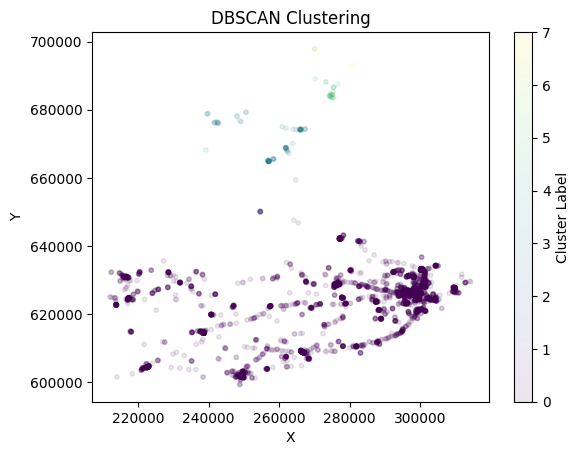

In [47]:
plt.scatter(mopsi_df['x'], mopsi_df['y'], c=mopsi_df['cluster_dbscan'], cmap='viridis', marker='o', s=10, alpha=0.1)
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.show()

### DBSCAN Groups almost everything into the same cluster, which could be what you're looking for, but doesn't seem right for me

In [51]:
from sklearn.metrics import silhouette_score

mopsi_kmeans_score = silhouette_score(mopsi_df[['x', 'y']], mopsi_df['cluster'])
mopsi_my_score = silhouette_score(mopsi_df[['x', 'y']], mopsi_df['cluster_mine'])
mopsi_dbscan_score = silhouette_score(mopsi_df[['x', 'y']], mopsi_df['cluster_dbscan'])

print('Higher is better')
print('KMeans Silhouette Score:', mopsi_kmeans_score)
print('My Silhouette Score:', mopsi_my_score)
print('DBSCAN Silhoutette Score:', mopsi_dbscan_score)

Higher is better
KMeans Silhouette Score: 0.8048164741895115
My Silhouette Score: 0.8020346126005863
DBSCAN Silhoutette Score: 0.5995571839400852


In [52]:
from sklearn.metrics import davies_bouldin_score

mopsi_kmeans_dbi = davies_bouldin_score(mopsi_df[['x', 'y']], mopsi_df['cluster'])
mopsi_my_dbi = davies_bouldin_score(mopsi_df[['x', 'y']], mopsi_df['cluster_mine'])
mopsi_dbscan_dbi = davies_bouldin_score(mopsi_df[['x', 'y']], mopsi_df['cluster_dbscan'])

print('Lower is better')
print('KMeans Davies-Bouldin Index:', mopsi_kmeans_dbi)
print('My Davies-Bouldin Index:', mopsi_my_dbi)
print('DBSCAN Davies-Bouldin Index:', mopsi_dbscan_dbi)

Lower is better
KMeans Davies-Bouldin Index: 0.6169137610009303
My Davies-Bouldin Index: 0.6607080338076479
DBSCAN Davies-Bouldin Index: 0.46543735393963365


In [54]:
from sklearn.metrics import calinski_harabasz_score

mopsi_kmeans_ch = calinski_harabasz_score(mopsi_df[['x', 'y']], mopsi_df['cluster'])
mopsi_my_ch = calinski_harabasz_score(mopsi_df[['x', 'y']], mopsi_df['cluster_mine'])
mopsi_dbscan_ch = calinski_harabasz_score(mopsi_df[['x', 'y']], mopsi_df['cluster_dbscan'])

print('Higher is better')
print('KMeans Calinski-Harabasz Index:', mopsi_kmeans_ch)
print('My Calinski-Harabasz Index:', mopsi_my_ch)
print('DBSCAN Calinski-Harabasz Index:', mopsi_dbscan_ch)

Higher is better
KMeans Calinski-Harabasz Index: 38032.60392866448
My Calinski-Harabasz Index: 38851.302692728845
DBSCAN Calinski-Harabasz Index: 121.87638513897403


### Overall KMeans seems to work better according to the scores, and I like the clusters better since it doesn't group the whole country together

## Cluster taxi trips

In [1]:
import pandas as pd

taxi_df = pd.read_csv('Taxi_Trips__2013-2023_.csv')
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

In [2]:
taxi_df.iloc[:1,:]

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.2,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN


### Remove all but pickup location, per the instructions

In [3]:
taxi_df.loc[:, 'x'] = taxi_df['Pickup Centroid Longitude']
taxi_df.loc[:, 'y'] = taxi_df['Pickup Centroid Latitude']
taxi_df = taxi_df[['x', 'y']]

In [4]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       95657 non-null  float64
 1   y       95657 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB


In [5]:
taxi_df.iloc[:1,:]

,x,y
0,-87.913625,41.980264


In [6]:
taxi_df = taxi_df[~taxi_df.isna().any(axis=1)]

In [7]:
taxi_df.describe()

,x,y
count,95657.000000,95657.000000
mean,-87.689956,41.898703
std,0.104274,0.064621
min,-87.913625,41.660136
25%,-87.695013,41.878866
50%,-87.642649,41.895033
75%,-87.626211,41.949829
max,-87.534903,42.015934


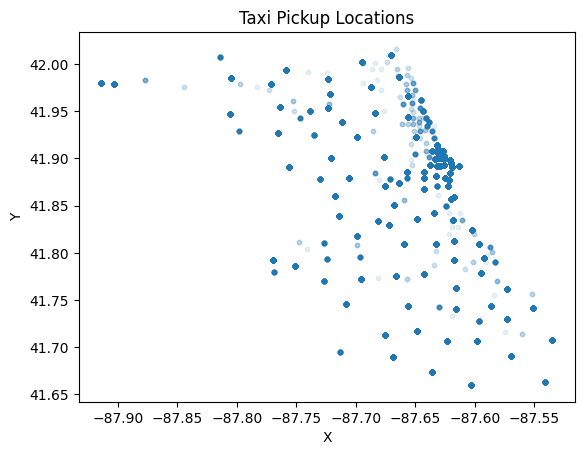

In [8]:
import matplotlib.pyplot as plt

plt.scatter(taxi_df['x'], taxi_df['y'], marker='o', s=10, alpha=0.1)
plt.title('Taxi Pickup Locations')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

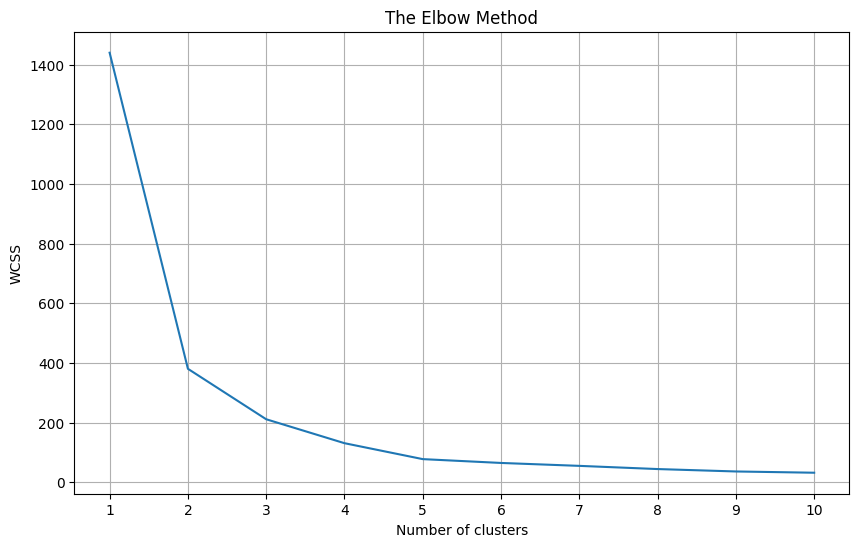

In [9]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(taxi_df[['x', 'y']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

#### Elbow shows 3, 4, or 5. I think 5 fits best here based off the elbow and the graphed data

In [10]:
kmeans = KMeans(n_clusters=5, random_state=1)

kmeans.fit(taxi_df[['x', 'y']])

taxi_df['cluster'] = kmeans.predict(taxi_df[['x', 'y']])

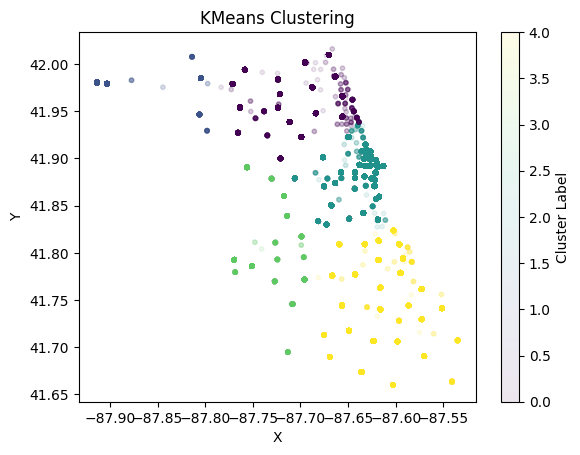

In [11]:
plt.scatter(taxi_df['x'], taxi_df['y'], c=taxi_df['cluster'], cmap='viridis', marker='o', s=10, alpha=0.1)
plt.title('KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.show()

In [16]:
from kmeans import kmeans

km5 = kmeans(5)

taxi_df['cluster_mine'], _ = km5.fit(taxi_df[['x', 'y']])

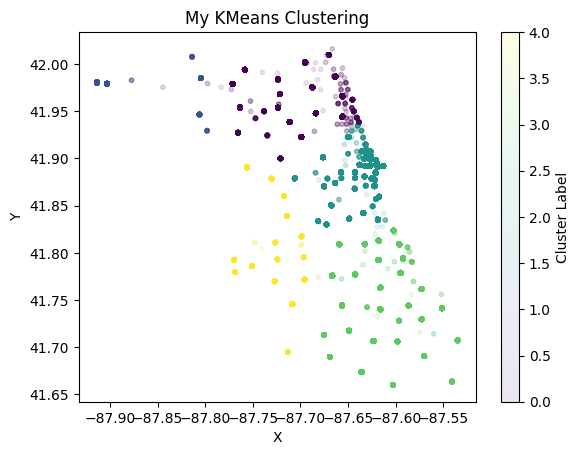

In [44]:
plt.scatter(taxi_df['x'], taxi_df['y'], c=taxi_df['cluster_mine'], cmap='viridis', marker='o', s=10, alpha=0.1)
plt.title('My KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.show()

In [45]:
import numpy as np

taxi_conditions = [taxi_df['cluster_mine'] == 4, taxi_df['cluster_mine'] == 3, taxi_df['cluster_mine'] == 2, taxi_df['cluster_mine'] == 1, taxi_df['cluster_mine'] == 0]
taxi_choices = [3, 4, 2, 1, 0]

taxi_df['cluster_mine'] = np.select(taxi_conditions, taxi_choices)

In [46]:
pd.DataFrame(taxi_df['cluster'] == taxi_df['cluster_mine']).value_counts()

0   
True    95657
Name: count, dtype: int64

In [49]:
taxi_df.to_feather('taxi_clusters.feather')

In [50]:
test_df = pd.read_feather('taxi_clusters.feather')
test_df.iloc[:1,:]

,x,y,cluster,cluster_mine
0,-87.913625,41.980264,1,1


#### Kernel keeps dying running DBSCAN, so I will omit it here

In [47]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler

# taxi_dbscan = DBSCAN(eps=0.7, min_samples=1)

# scaler = StandardScaler()
# scaled_taxi = scaler.fit_transform(taxi_df[['x', 'y']].values)

# taxi_df['cluster_dbscan'] = taxi_dbscan.fit_predict(taxi_df[['x', 'y']].values)
# taxi_df['cluster_dbscan'].value_counts()

In [51]:
from sklearn.metrics import silhouette_score

taxi_kmeans_score = silhouette_score(taxi_df[['x', 'y']], taxi_df['cluster'])
taxi_my_score = silhouette_score(taxi_df[['x', 'y']], taxi_df['cluster_mine'])

print('KMeans Silhouette Score:', taxi_kmeans_score)
print('My Silhouette Score:', taxi_my_score)

KMeans Silhouette Score: 0.7045257996694463
My Silhouette Score: 0.7045257996694463


In [52]:
from sklearn.metrics import davies_bouldin_score

taxi_kmeans_dbi = davies_bouldin_score(taxi_df[['x', 'y']], taxi_df['cluster'])
taxi_my_dbi = davies_bouldin_score(taxi_df[['x', 'y']], taxi_df['cluster_mine'])

print('Lower is better')
print('KMeans Davies-Bouldin Index:', taxi_kmeans_dbi)
print('My Davies-Bouldin Index:', taxi_my_dbi)

Lower is better
KMeans Davies-Bouldin Index: 0.48503843140824465
My Davies-Bouldin Index: 0.48503843140824465


In [53]:
from sklearn.metrics import calinski_harabasz_score

taxi_kmeans_ch = calinski_harabasz_score(taxi_df[['x', 'y']], taxi_df['cluster'])
taxi_my_ch = calinski_harabasz_score(taxi_df[['x', 'y']], taxi_df['cluster_mine'])

print('Higher is better')
print('KMeans Calinski-Harabasz Index:', taxi_kmeans_ch)
print('My Calinski-Harabasz Index:', taxi_my_ch)

Higher is better
KMeans Calinski-Harabasz Index: 421117.23506453395
My Calinski-Harabasz Index: 421117.23506453395


#### I don't have dbscan to compare it to, but kmeans has great Silhouette, Davies-Bouldin Index, and Calinski-Harabasz scores.

#### The DBI is even as good as DBSCAN for the mopsi dataset